In [1]:
import matplotlib.pyplot as plot
import numpy as np

%matplotlib inline

In [2]:
from pyclouds import cloud_microphysics, parameterisations
from pyclouds.common import Var
from pyclouds.plotting import plot_hydrometeor_evolution

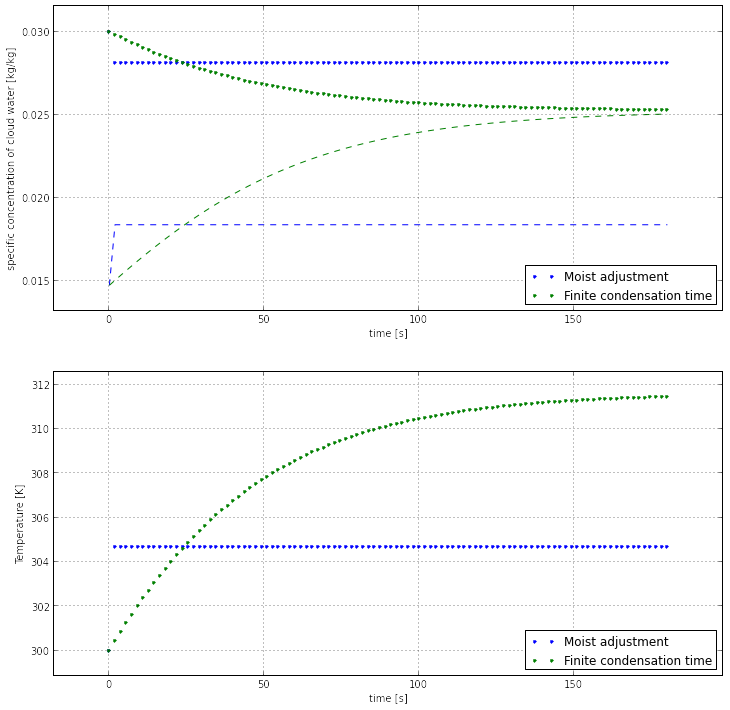

In [5]:
initial_condition = np.zeros((Var.NUM))
initial_condition[Var.q_v] = 0.03
initial_condition[Var.T] = 300.
p0 = 101325.1  # [Pa]

t_ = np.linspace(0., 180., 100)

parameterisations.pv_sat = parameterisations.SaturationVapourPressure(parameterisations.SaturationVapourPressure.CCFM_constants)

microphysics_model = cloud_microphysics.MoistAdjustmentMicrophysics(parameterisations=parameterisations,)
sol = microphysics_model.integrate(initial_condition=initial_condition, t=t_, p0=p0)
sol2 = cloud_microphysics.FiniteCondensationTimeMicrophysics(parameterisations=parameterisations).integrate(initial_condition=initial_condition, t=t_, p0=p0)

#sol2.plot()
plot_hydrometeor_evolution([sol, sol2], variables=['q_v', 'T',])